In [1]:
import os
import pandas as pd

In [2]:
SELECTED_CONTEXT_COLUMNS = ['query', 'correct_score']  #, 'context_feedback']
SOURCE_DIR = os.path.join('data', 'temp')
topk3 = os.path.join(SOURCE_DIR, 'baseline_rag_result_R3_correctness.csv')
topk8 = os.path.join(SOURCE_DIR, 'baseline_rag_result_correctness.csv')

k3 = pd.read_csv(topk3)
k3 = k3[SELECTED_CONTEXT_COLUMNS]
k3['answer_by'] = 'topk=3'
k8 = pd.read_csv(topk8)
k8 = k8[SELECTED_CONTEXT_COLUMNS]
k8['answer_by'] = 'topk=8'
correct_df = pd.concat([k3, k8], axis=0)
correct_df

,query,correct_score,answer_by
0,這門課希望學生從使用者變成什麼？,4.0,topk=3
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,2.0,topk=3
2,哪個軟體被用來合成講師的聲音？,2.0,topk=3
3,這門課的上課時間是週五下午幾點幾分開始？,5.0,topk=3
4,前兩個作業的截止日期延後到哪一天繳交？,3.0,topk=3
5,助教預計在幾月幾號把成績送出？,5.0,topk=3
6,課程中目前保留需要訓練多少時間的作業？,1.0,topk=3
7,如果你對生成式AI一無所知，建議先看哪一門課程？,3.0,topk=3
0,這門課希望學生從使用者變成什麼？,5.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,5.0,topk=8


In [3]:
SELECTED_CONTEXT_COLUMNS = ['query', 'answer_score']  #, 'context_feedback']
SOURCE_DIR = os.path.join('data', 'temp')
topk3 = os.path.join(SOURCE_DIR, 'baseline_rag_result_R3_answer_relevancy.csv')
topk8 = os.path.join(SOURCE_DIR, 'baseline_rag_result_answer_relevancy.csv')

k3 = pd.read_csv(topk3)
k3 = k3[SELECTED_CONTEXT_COLUMNS]
k3['answer_by'] = 'topk=3'
k8 = pd.read_csv(topk8)
k8 = k8[SELECTED_CONTEXT_COLUMNS]
k8['answer_by'] = 'topk=8'
answer_df = pd.concat([k3, k8], axis=0)
answer_df


,query,answer_score,answer_by
0,這門課希望學生從使用者變成什麼？,1.0,topk=3
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.5,topk=3
2,哪個軟體被用來合成講師的聲音？,1.0,topk=3
3,這門課的上課時間是週五下午幾點幾分開始？,1.0,topk=3
4,前兩個作業的截止日期延後到哪一天繳交？,1.0,topk=3
5,助教預計在幾月幾號把成績送出？,1.0,topk=3
6,課程中目前保留需要訓練多少時間的作業？,1.0,topk=3
7,如果你對生成式AI一無所知，建議先看哪一門課程？,1.0,topk=3
0,這門課希望學生從使用者變成什麼？,1.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.0,topk=8


In [4]:
df = pd.merge(answer_df, correct_df, how='left', on=['query', 'answer_by'])
df.head(3)

,query,answer_score,answer_by,correct_score
0,這門課希望學生從使用者變成什麼？,1.0,topk=3,4.0
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.5,topk=3,2.0
2,哪個軟體被用來合成講師的聲音？,1.0,topk=3,2.0


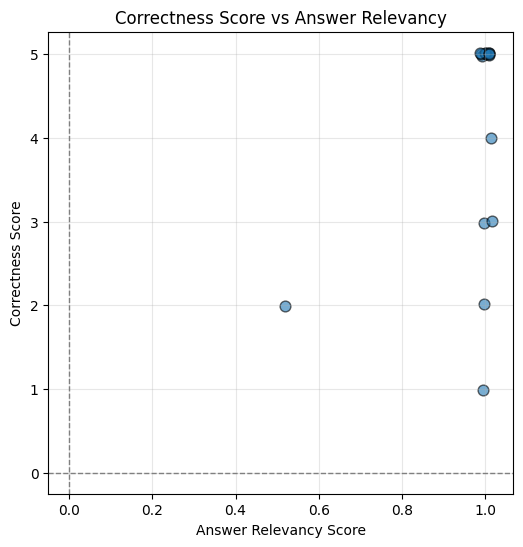

In [6]:
import numpy as np
import matplotlib.pyplot as plt

answer_score = df['answer_score'].to_numpy()
correct_score = df['correct_score'].to_numpy()

# 加上小擾動 (jitter)，避免點完全重疊
jitter_strength = 0.02  # 可以依需求調整
x = answer_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(answer_score))
y = correct_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(correct_score))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.6, s=60, edgecolor='k')

# 畫 threshold 線 (例如 0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Answer Relevancy Score")
plt.ylabel("Correctness Score")
plt.title("Correctness Score vs Answer Relevancy")
plt.grid(alpha=0.3)
plt.show()
